# ANN Model creation and testing

## Contents

1. Training data generation
2. ANN model training and testing
3. Implementation of the model in GWSNR

In [48]:
# # If you have not installed the following packages, please uncomment and run the following command:
# !pip install ler

## 1. Training data generation

* The training data is generated using [ler](https://ler.readthedocs.io/en/latest/) package.
* Data needs to be trained for each detector separately.
* I will choose 'L1' detector for this notebook with the following specified parameters:
    * Sampling frequency : 2048 Hz
    * waveform approximant : IMRPhenomXPHM
    * minimum frequency : 20.0
    * psd : aLIGO_O4_high_asd.txt from `pycbc` package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ler.utils import TrainingDataGenerator

In [2]:
tdg = TrainingDataGenerator(
    npool=8,  # number of processes
    verbose=False, # set it to True if you are running the code for the first time
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={
        'L1': 'aLIGO_O4_high_asd.txt',
    }, # chosen interferometer is 'L1'. If multiple interferometers are chosen, optimal network SNR will be considered.
    spin_zero=False,
    spin_precessing=True,
    snr_type='inner_product',  # 'interpolation' or 'inner_product'
)

* `ler` package, by default, generates astrophysical signals that most likely will not be detected by the detector, i.e. low SNR signals.

* But you want your ANN model to be sensitive to the signals that near the detection threshold.

* So, I will generate most of the training data with SNR near the detection threshold.

**Note:** Increase sample size of the training data to get better accuracy in the ANN model.

In [ ]:
# might take 13mins~15mins
# 48 mins 43.4 s, 20000 samples with 8 processes and batch_size=400000
ler = tdg.gw_parameters_generator(
    size=20000,  # number of samples to generate
    batch_size=400000,  # reduce this number if you have memory issues
    snr_recalculation=True,  # pick SNR generated with 'interpolation'; recalculate SNR using 'inner product'
    trim_to_size=False, verbose=True,
    data_distribution_range = [0., 2., 4., 6., 8., 10., 12., 14., 16., 100.],  # equal data samples will be distributed in these ranges
    replace=False,  # set to True if you want to replace the existing data
    output_jsonfile="L1_IMRPhenomXPHM_O4_high_asd_1.json",
)


Initializing GWRATES class...

total event to collect: 20000



100%|████████████████████████████████████████████████████████████| 421/421 [00:01<00:00, 397.99it/s]


Collected number of events: 351


100%|████████████████████████████████████████████████████████████| 374/374 [00:01<00:00, 373.93it/s]


Collected number of events: 693


100%|████████████████████████████████████████████████████████████| 321/321 [00:00<00:00, 322.60it/s]


Collected number of events: 972


100%|████████████████████████████████████████████████████████████| 396/396 [00:01<00:00, 386.14it/s]


Collected number of events: 1260


100%|████████████████████████████████████████████████████████████| 376/376 [00:01<00:00, 290.48it/s]


Collected number of events: 1575


100%|████████████████████████████████████████████████████████████| 367/367 [00:01<00:00, 365.11it/s]


Collected number of events: 1881


100%|████████████████████████████████████████████████████████████| 520/520 [00:01<00:00, 437.15it/s]


Collected number of events: 2295


100%|████████████████████████████████████████████████████████████| 412/412 [00:01<00:00, 397.07it/s]


Collected number of events: 2637


100%|████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 403.73it/s]


Collected number of events: 2943


100%|████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 359.49it/s]


Collected number of events: 3222


100%|████████████████████████████████████████████████████████████| 457/457 [00:01<00:00, 401.41it/s]


Collected number of events: 3564


100%|████████████████████████████████████████████████████████████| 285/285 [00:00<00:00, 339.15it/s]


Collected number of events: 3780


100%|████████████████████████████████████████████████████████████| 322/322 [00:00<00:00, 330.35it/s]


Collected number of events: 4041


100%|████████████████████████████████████████████████████████████| 351/351 [00:00<00:00, 378.32it/s]


Collected number of events: 4329


100%|████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 372.13it/s]


Collected number of events: 4608


100%|████████████████████████████████████████████████████████████| 322/322 [00:00<00:00, 357.22it/s]


Collected number of events: 4869


100%|████████████████████████████████████████████████████████████| 385/385 [00:01<00:00, 384.66it/s]


Collected number of events: 5157


100%|████████████████████████████████████████████████████████████| 378/378 [00:00<00:00, 386.83it/s]


Collected number of events: 5481


100%|████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 340.98it/s]


Collected number of events: 5679


100%|████████████████████████████████████████████████████████████| 357/357 [00:00<00:00, 378.26it/s]


Collected number of events: 6003


100%|████████████████████████████████████████████████████████████| 349/349 [00:00<00:00, 365.33it/s]


Collected number of events: 6264


100%|████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 329.49it/s]


Collected number of events: 6516


100%|████████████████████████████████████████████████████████████| 387/387 [00:01<00:00, 375.69it/s]


Collected number of events: 6804


100%|████████████████████████████████████████████████████████████| 385/385 [00:01<00:00, 369.63it/s]


Collected number of events: 7128


100%|████████████████████████████████████████████████████████████| 322/322 [00:01<00:00, 227.73it/s]


Collected number of events: 7389


100%|████████████████████████████████████████████████████████████| 403/403 [00:01<00:00, 379.41it/s]


Collected number of events: 7740


100%|████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 360.69it/s]


Collected number of events: 8019


100%|████████████████████████████████████████████████████████████| 356/356 [00:00<00:00, 376.74it/s]


Collected number of events: 8325


100%|████████████████████████████████████████████████████████████| 357/357 [00:00<00:00, 379.91it/s]


Collected number of events: 8631


100%|████████████████████████████████████████████████████████████| 401/401 [00:01<00:00, 374.02it/s]


Collected number of events: 8982


100%|████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 325.78it/s]


Collected number of events: 9171


100%|████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 335.21it/s]


Collected number of events: 9396


100%|████████████████████████████████████████████████████████████| 493/493 [00:01<00:00, 411.93it/s]


Collected number of events: 9783


100%|████████████████████████████████████████████████████████████| 409/409 [00:01<00:00, 394.78it/s]


Collected number of events: 10089


100%|████████████████████████████████████████████████████████████| 387/387 [00:01<00:00, 375.81it/s]


Collected number of events: 10413


100%|████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 343.13it/s]


Collected number of events: 10629


100%|████████████████████████████████████████████████████████████| 418/418 [00:01<00:00, 393.49it/s]


Collected number of events: 10962


100%|████████████████████████████████████████████████████████████| 315/315 [00:00<00:00, 361.75it/s]


Collected number of events: 11232


100%|████████████████████████████████████████████████████████████| 419/419 [00:01<00:00, 388.37it/s]


Collected number of events: 11610


100%|████████████████████████████████████████████████████████████| 374/374 [00:01<00:00, 362.82it/s]


Collected number of events: 11943


100%|████████████████████████████████████████████████████████████| 321/321 [00:00<00:00, 360.88it/s]


Collected number of events: 12204


100%|████████████████████████████████████████████████████████████| 377/377 [00:00<00:00, 381.63it/s]


Collected number of events: 12537


100%|████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 366.33it/s]


Collected number of events: 12789


100%|████████████████████████████████████████████████████████████| 323/323 [00:01<00:00, 192.51it/s]


Collected number of events: 13059


100%|████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 332.51it/s]


Collected number of events: 13257


100%|████████████████████████████████████████████████████████████| 378/378 [00:01<00:00, 362.00it/s]


Collected number of events: 13554


100%|████████████████████████████████████████████████████████████| 331/331 [00:00<00:00, 360.75it/s]


Collected number of events: 13815


100%|████████████████████████████████████████████████████████████| 324/324 [00:00<00:00, 362.43it/s]


Collected number of events: 14094


100%|████████████████████████████████████████████████████████████| 359/359 [00:00<00:00, 370.61it/s]


Collected number of events: 14382


100%|████████████████████████████████████████████████████████████| 322/322 [00:00<00:00, 356.31it/s]


Collected number of events: 14607


100%|████████████████████████████████████████████████████████████| 354/354 [00:00<00:00, 382.58it/s]


Collected number of events: 14886


100%|████████████████████████████████████████████████████████████| 491/491 [00:01<00:00, 409.03it/s]


Collected number of events: 15273


100%|████████████████████████████████████████████████████████████| 285/285 [00:00<00:00, 342.33it/s]


Collected number of events: 15471


100%|████████████████████████████████████████████████████████████| 385/385 [00:01<00:00, 379.94it/s]


Collected number of events: 15795


100%|████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 337.75it/s]


Collected number of events: 15966


100%|████████████████████████████████████████████████████████████| 391/391 [00:01<00:00, 382.47it/s]


Collected number of events: 16254


100%|████████████████████████████████████████████████████████████| 401/401 [00:00<00:00, 405.10it/s]


Collected number of events: 16560


100%|████████████████████████████████████████████████████████████| 324/324 [00:00<00:00, 349.93it/s]


Collected number of events: 16821


100%|████████████████████████████████████████████████████████████| 475/475 [00:01<00:00, 402.47it/s]


Collected number of events: 17226


100%|████████████████████████████████████████████████████████████| 369/369 [00:01<00:00, 368.93it/s]


Collected number of events: 17532


100%|████████████████████████████████████████████████████████████| 481/481 [00:01<00:00, 410.99it/s]


Collected number of events: 17964


100%|████████████████████████████████████████████████████████████| 412/412 [00:01<00:00, 387.43it/s]


Collected number of events: 18279


100%|████████████████████████████████████████████████████████████| 288/288 [00:00<00:00, 332.58it/s]


Collected number of events: 18504


100%|████████████████████████████████████████████████████████████| 312/312 [00:00<00:00, 361.46it/s]


Collected number of events: 18783


100%|████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 343.61it/s]


Collected number of events: 19071


100%|████████████████████████████████████████████████████████████| 312/312 [00:00<00:00, 348.02it/s]


Collected number of events: 19332


100%|████████████████████████████████████████████████████████████| 314/314 [00:00<00:00, 351.03it/s]


Collected number of events: 19584


100%|████████████████████████████████████████████████████████████| 277/277 [00:00<00:00, 335.94it/s]


Collected number of events: 19782


100%|████████████████████████████████████████████████████████████| 375/375 [00:01<00:00, 371.35it/s]


Collected number of events: 20070
final size: 20070

json file saved at: ./ler_data/L1_IMRPhenomXPHM_O4_high_asd_1.json



In [ ]:
# might take 2mins~3mins
# 10 mins 0.7 s, 10000 samples with 8 processes and batch_size=200000  
tdg.gw_parameters_generator(
    size=10000, 
    batch_size=200000, 
    snr_recalculation=True,
    trim_to_size=False, verbose=True, 
    data_distribution_range = [6., 8., 10.], # equal data samples will be distributed in these ranges
    replace=False,
    output_jsonfile="L1_IMRPhenomXPHM_O4_high_asd_2.json",
)


Initializing GWRATES class...

total event to collect: 10000



100%|████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 366.27it/s]


Collected number of events: 274


100%|████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 361.29it/s]


Collected number of events: 538


100%|████████████████████████████████████████████████████████████| 332/332 [00:02<00:00, 150.45it/s]


Collected number of events: 826


100%|████████████████████████████████████████████████████████████| 318/318 [00:00<00:00, 360.55it/s]


Collected number of events: 1078


100%|████████████████████████████████████████████████████████████| 314/314 [00:00<00:00, 370.24it/s]


Collected number of events: 1334


100%|████████████████████████████████████████████████████████████| 314/314 [00:00<00:00, 354.81it/s]


Collected number of events: 1582


100%|████████████████████████████████████████████████████████████| 284/284 [00:00<00:00, 334.30it/s]


Collected number of events: 1824


100%|████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 356.35it/s]


Collected number of events: 2058


100%|████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 361.79it/s]


Collected number of events: 2314


100%|████████████████████████████████████████████████████████████| 308/308 [00:00<00:00, 355.80it/s]


Collected number of events: 2554


100%|████████████████████████████████████████████████████████████| 334/334 [00:00<00:00, 352.36it/s]


Collected number of events: 2846


100%|████████████████████████████████████████████████████████████| 332/332 [00:00<00:00, 367.79it/s]


Collected number of events: 3126


100%|████████████████████████████████████████████████████████████| 328/328 [00:00<00:00, 359.78it/s]


Collected number of events: 3396


100%|████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 380.59it/s]


Collected number of events: 3662


100%|████████████████████████████████████████████████████████████| 382/382 [00:00<00:00, 386.53it/s]


Collected number of events: 3970


100%|████████████████████████████████████████████████████████████| 312/312 [00:00<00:00, 365.40it/s]


Collected number of events: 4232


100%|████████████████████████████████████████████████████████████| 330/330 [00:00<00:00, 373.92it/s]


Collected number of events: 4502


100%|████████████████████████████████████████████████████████████| 356/356 [00:00<00:00, 385.59it/s]


Collected number of events: 4806


100%|████████████████████████████████████████████████████████████| 286/286 [00:00<00:00, 353.21it/s]


Collected number of events: 5038


100%|████████████████████████████████████████████████████████████| 284/284 [00:00<00:00, 342.70it/s]


Collected number of events: 5270


100%|████████████████████████████████████████████████████████████| 382/382 [00:02<00:00, 157.59it/s]


Collected number of events: 5566


100%|████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 373.69it/s]


Collected number of events: 5830


100%|████████████████████████████████████████████████████████████| 352/352 [00:00<00:00, 377.60it/s]


Collected number of events: 6100


100%|████████████████████████████████████████████████████████████| 264/264 [00:00<00:00, 323.87it/s]


Collected number of events: 6308


100%|████████████████████████████████████████████████████████████| 342/342 [00:00<00:00, 361.53it/s]


Collected number of events: 6594


100%|████████████████████████████████████████████████████████████| 350/350 [00:00<00:00, 374.16it/s]


Collected number of events: 6878


100%|████████████████████████████████████████████████████████████| 290/290 [00:00<00:00, 329.36it/s]


Collected number of events: 7112


100%|████████████████████████████████████████████████████████████| 326/326 [00:00<00:00, 363.04it/s]


Collected number of events: 7378


100%|████████████████████████████████████████████████████████████| 302/302 [00:00<00:00, 338.27it/s]


Collected number of events: 7632


100%|████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 342.18it/s]


Collected number of events: 7896


100%|████████████████████████████████████████████████████████████| 320/320 [00:00<00:00, 351.33it/s]


Collected number of events: 8154


100%|████████████████████████████████████████████████████████████| 380/380 [00:00<00:00, 385.46it/s]


Collected number of events: 8484


100%|████████████████████████████████████████████████████████████| 336/336 [00:00<00:00, 362.23it/s]


Collected number of events: 8758


100%|████████████████████████████████████████████████████████████| 306/306 [00:00<00:00, 350.73it/s]


Collected number of events: 9008


100%|████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 348.81it/s]


Collected number of events: 9248


100%|████████████████████████████████████████████████████████████| 358/358 [00:00<00:00, 377.99it/s]


Collected number of events: 9542


100%|████████████████████████████████████████████████████████████| 296/296 [00:00<00:00, 340.93it/s]


Collected number of events: 9788


100%|████████████████████████████████████████████████████████████| 316/316 [00:00<00:00, 358.84it/s]


Collected number of events: 10028
final size: 10028

json file saved at: ./ler_data/L1_IMRPhenomXPHM_O4_high_asd_2.json



In [9]:
tdg.gw_parameters_generator(
    size=10000,
    batch_size=10000, 
    snr_recalculation=True,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None,
    replace=True,
    output_jsonfile="L1_IMRPhenomXPHM_O4_high_asd_3.json",
)


Initializing GWRATES class...

total event to collect: 10000

final size: 10000

json file saved at: ./ler_data/L1_IMRPhenomXPHM_O4_high_asd_3.json



### Additional random samples

In [16]:
from gwsnr import GWSNR
import numpy as np

gwsnr = GWSNR(
    npool=8,  # number of processes
    # GWSNR parameters
    sampling_frequency=2048.,
    waveform_approximant='IMRPhenomXPHM',  # spin-precessing waveform model
    minimum_frequency=20.,
    psds={
        'L1': 'aLIGO_O4_high_asd.txt',
    }, # chosen interferometer is 'L1'. If multiple interferometers are chosen, optimal network SNR will be considered.
    snr_type='inner_product',  # 'interpolation' or 'inner_product'
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)

Chosen GWSNR initialization parameters:

npool:  8
snr type:  inner_product
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt')]




In [ ]:
# gerneral case, random parameters
# chirp mass can go upto only 95 if f_min=20. to get non zero SNR
nsamples = 50000
chirp_mass = np.linspace(5,60,nsamples)
mass_ratio = np.random.uniform(0.2,1,size=nsamples)
param_dict = dict(
    mass_1 = (chirp_mass*(1+mass_ratio)**(1/5))/mass_ratio**(3/5),
    mass_2 = chirp_mass*mass_ratio**(2/5)*(1+mass_ratio)**(1/5),
    # Fix luminosity distance
    luminosity_distance = np.random.uniform(40, 1000, size=nsamples),  # in Mpc
    # Randomly sample everything else:
    theta_jn = np.random.uniform(0,2*np.pi, size=nsamples),
    ra = np.random.uniform(0,2*np.pi, size=nsamples), 
    dec = np.random.uniform(0,np.pi, size=nsamples), 
    psi = np.random.uniform(0,2*np.pi, size=nsamples),
    phase = np.random.uniform(0,2*np.pi, size=nsamples),
    geocent_time = 1246527224.169434*np.ones(nsamples),
    # spin zero
    a_1 = np.random.uniform(0.0,0.8, size=nsamples),
    a_2 = np.random.uniform(0.0,0.8, size=nsamples),
    tilt_1 = np.random.uniform(0, np.pi, size=nsamples),  # tilt angle of the primary black hole in radians
    tilt_2 = np.random.uniform(0, np.pi, size=nsamples),
    phi_12 = np.random.uniform(0, 2*np.pi, size=nsamples),  # Relative angle between the primary and secondary spin of the binary in radians
    phi_jl = np.random.uniform(0, 2*np.pi, size=nsamples),  # Angle between the total angular momentum and the orbital angular momentum in radians
)

snrs_ = gwsnr.snr(gw_param_dict=param_dict)
# time: 0.2 s for 50000 samples with 8 processes

solving SNR with inner product


100%|███████████████████████████████████████████████████████| 49928/49928 [00:48<00:00, 1037.67it/s]


In [46]:
param_dict.update(snrs_)
from gwsnr.utils import append_json
append_json(
    file_name="ler_data/L1_IMRPhenomXPHM_O4_high_asd_4.json", 
    new_dictionary =param_dict,
    replace=True,  # set to True if you want to replace the existing data
);

### Combine all the data files into one

In [51]:
tdg.combine_dicts(
    file_name_list=["L1_IMRPhenomXPHM_O4_high_asd_1.json", "L1_IMRPhenomXPHM_O4_high_asd_2.json", "L1_IMRPhenomXPHM_O4_high_asd_3.json", "L1_IMRPhenomXPHM_O4_high_asd_4.json"],
    detector='L1',
    output_jsonfile="L1_IMRPhenomXPHM_O4_high_asd.json",
)

json file saved at: ./ler_data/L1_IMRPhenomXPHM_O4_high_asd.json



In [52]:
from gwsnr.utils import get_param_from_json
test1 = get_param_from_json("./ler_data/L1_IMRPhenomXPHM_O4_high_asd.json")

In [55]:
# from gwsnr.utils import get_param_from_json
# test1 = get_param_from_json("./ler_data/L1_IMRPhenomXPHM_O4_high_asd_1.json")['L1']
# plt.figure(figsize=[4,4])
# plt.hist(test1, bins=30, density=True, alpha=0.5, color='b', histtype='step', label='L1')
# plt.legend()
# plt.show()

Number of samples: 90098


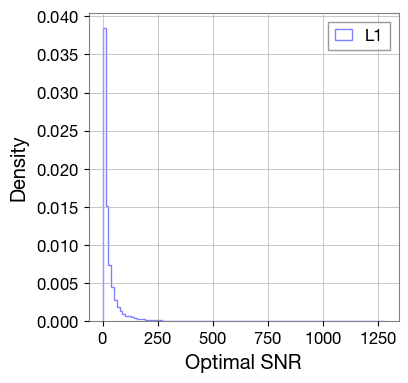

In [56]:
snr = np.array(test1['L1'])
print(f"Number of samples: {len(snr)}")

plt.figure(figsize=[4,4])
plt.hist(snr, bins=100, density=True, alpha=0.5, color='b', histtype='step', label='L1')
# plt.xlim([0, 40])
plt.xlabel('Optimal SNR')
plt.ylabel('Density')
plt.legend()
plt.show()

## 2. ANN model training and testing

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr.ann import ANNModelGenerator

In [ ]:
from gwsnr import GWSNR

gwsnr = GWSNR(
    npool=8,
    # gwsnr args
    mtot_min=2.0,
    mtot_max=439.6,
    ratio_min=0.1,
    ratio_max=1.0,
    spin_max=0.9,
    mtot_resolution=200,
    ratio_resolution=50,
    spin_resolution=20,
    sampling_frequency=2048.0,
    waveform_approximant="IMRPhenomXPHM",
    minimum_frequency=20.0,
    snr_type="interpolation_aligned_spins_jax",
    psds=None,
    ifos=None,
    interpolator_dir="./interpolator_pickle",
    create_new_interpolator=False,
    gwsnr_verbose=True,
    multiprocessing_verbose=True,
    mtot_cut=True,
    snr_th=8.,
)


Initializing GWSNR class...

psds not given. Choosing bilby's default psds
Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be generated for L1 detector at ./interpolator_pickle/L1/partialSNR_dict_7.pickle
Interpolator will be generated for H1 detector at ./interpolator_pickle/H1/partialSNR_dict_4.pickle
Interpolator will be generated for V1 detector at ./interpolator_pickle/V1/partialSNR_dict_4.pickle
Please be patient while the interpolator is generated
Generating interpolator for ['L1', 'H1', 'V1'] detectors


100%|███████████████████████████████████████████████████| 3996800/3996800 [43:19<00:00, 1537.37it/s]



Saving Partial-SNR for L1 detector with shape (50, 200, 20, 20)

Saving Partial-SNR for H1 detector with shape (50, 200, 20, 20)

Saving Partial-SNR for V1 detector with shape (50, 200, 20, 20)

Chosen GWSNR initialization parameters:

npool:  8
snr type:  interpolation_aligned_spins_jax
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/si

In [59]:
amg = ANNModelGenerator(
    directory='./ler_data',
    npool=8,
    gwsnr_verbose=False,
    snr_th=8.0,
    waveform_approximant="IMRPhenomXPHM",
    psds={'L1': 'aLIGO_O4_high_asd.txt'},
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_7.pickle




In [60]:
amg.ann_model_training(
    gw_param_dict='L1_IMRPhenomXPHM_O4_high_asd.json',
    randomize=True,
    test_size=0.1,
    random_state=42,
    num_nodes_list = [5, 32, 32, 1],
    activation_fn_list = ['relu', 'relu', 'sigmoid', 'linear'],
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy'],
    batch_size=32,
    epochs=100,
    error_adjustment_snr_range=[4,12],
    ann_file_name = 'ann_model.h5',
    scaler_file_name = 'scaler.pkl',
    error_adjustment_file_name='error_adjustment.json',
    ann_path_dict_file_name='ann_path_dict.json',
)

# # Uncomment the following, if you have already trained the model
# # load the trained model
# amg.load_model_scaler_error(
#     ann_file_name='ann_model.h5', 
#     scaler_file_name='scaler.pkl',
#     error_adjustment_file_name='error_adjustment.json',
# )

Epoch 1/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 337us/step - accuracy: 7.6711e-04 - loss: 4877.9238
Epoch 2/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 324us/step - accuracy: 0.0000e+00 - loss: 3241.9646
Epoch 3/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - accuracy: 0.0000e+00 - loss: 2706.2241
Epoch 4/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 303us/step - accuracy: 6.9117e-05 - loss: 1913.0134
Epoch 5/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 323us/step - accuracy: 1.1376e-04 - loss: 1482.2843
Epoch 6/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 319us/step - accuracy: 1.2193e-04 - loss: 1281.0835
Epoch 7/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - accuracy: 1.1512e-04 - loss: 1011.3148
Epoch 8/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step - accuracy: 7.4387e-05 - loss: 920.4585
Epoch 9/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step - accuracy: 1.3375e-04 - loss: 758.2746
Epoch 10/100
2534/2534 ━━━━━━━━━━━━━━━━━━━━ 1s 312us/step - accuracy: 2.4764e-04 - loss: 683.5906
Epoch 11/100
2534/2534

In [61]:
amg.pdet_error()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step
Error: 2.93%


(2.93007769145394,
 array([28.931156 ,  1.5676887, 45.20378  , ...,  1.6943634,
        14.48409  , 29.914669 ], dtype=float32),
 array([31.1153596 ,  1.17480755, 45.52784774, ...,  1.42045894,
        13.8106746 , 30.12296044]))

In [62]:
amg.pdet_confusion_matrix()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 252us/step
[[2753  138]
 [ 131 5988]]
Accuracy: 97.014%


(array([[2753,  138],
        [ 131, 5988]]),
 97.0144284128746,
 array([ True, False,  True, ..., False,  True,  True]),
 array([ True, False,  True, ..., False,  True,  True]))

2816/2816 ━━━━━━━━━━━━━━━━━━━━ 1s 220us/step


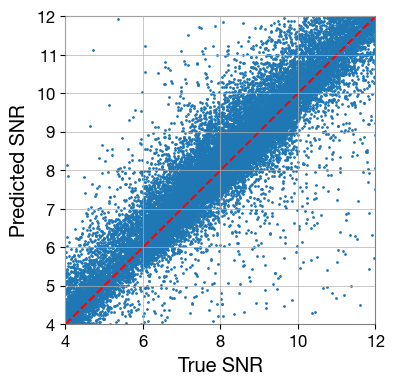

In [63]:
# predicted snr
pred_snr= amg.predict_snr(gw_param_dict='L1_IMRPhenomXPHM_O4_high_asd.json')
# true snr
true_snr = amg.get_parameters(gw_param_dict='L1_IMRPhenomXPHM_O4_high_asd.json')['L1']
# select only snr between 4 and 12
snr_min = 4
snr_max = 12
mask = (true_snr >= snr_min) & (true_snr <= snr_max)
true_snr = true_snr[mask]
pred_snr = pred_snr[mask]

# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([snr_min, snr_max])
plt.ylim([snr_min, snr_max])
plt.show()

In [64]:
# use the following function to predict the pdet
pred_pdet = amg.predict_pdet(gw_param_dict='L1_IMRPhenomXPHM_O4_high_asd.json', snr_threshold=8.0)

true_snr = amg.get_parameters(gw_param_dict='L1_IMRPhenomXPHM_O4_high_asd.json')['L1']
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)


2816/2816 ━━━━━━━━━━━━━━━━━━━━ 1s 220us/step
[[27153  1708]
 [ 1047 60190]]
0.9694221847321806


## 3. Implementation of the ANN model in GWSNR

Generate new astrophysical data and test the model on it using GWSNR class.

In [ ]:
from ler.utils import TrainingDataGenerator
# generate some new data
tdg = TrainingDataGenerator(
    npool=4,
    verbose=False, 
    ifos=['L1'],
    # GWSNR parameters
    sampling_frequency=2048,
    waveform_approximant='IMRPhenomXPHM',
    minimum_frequency=20,
    psds={
        'L1': 'aLIGO_O4_high_asd.txt',
    },
    pin_zero=False,
    spin_precessing=True,
    snr_type='inner_product',
)

tdg.gw_parameters_generator(
    size=20000, 
    batch_size=20000, 
    snr_recalculation=False,
    trim_to_size=False, 
    verbose=False, 
    data_distribution_range = None, 
    replace=False,
    output_jsonfile="L1_IMRPhenomXPHM_O4_high_asd_5.json",
)


Initializing GWRATES class...

current size of the json file: 20000

total event to collect: 20000

final size: 20000

json file saved at: ./ler_data/L1_IMRPhenomXPHM_O4_high_asd_5.json



* using GWSNR class, with the trained ANN model, you can generate SNR of the astrophysical GW signal parameters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gwsnr import GWSNR

gwsnr = GWSNR(
    snr_type='ann',
    waveform_approximant="IMRPhenomXPHM",
    psds={'L1': 'aLIGO_O4_high_asd.txt'},
    ann_path_dict='./ler_data/ann_path_dict.json',
)


Initializing GWSNR class...

Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
ANN model and scaler path is given. Using the given path.
ANN model for L1 is loaded from ./ler_data/ann_model.h5.
ANN scaler for L1 is loaded from ./ler_data/scaler.pkl.
ANN error_adjustment for L1 is loaded from ./ler_data/error_adjustment.json.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_7.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noi

In [2]:
# predicted snr, using ANN model 
pred_snr = gwsnr.snr(gw_param_dict='./ler_data/L1_IMRPhenomXPHM_O4_high_asd_4.json')['L1']

In [3]:
# true snr, using inner product
# true_snr = gwsnr.compute_bilby_snr(gw_param_dict='./ler_data/L1_IMRPhenomXPHM_O4_high_asd_5.json')['L1']

from gwsnr.utils import get_param_from_json
true_snr = get_param_from_json('./ler_data/L1_IMRPhenomXPHM_O4_high_asd_4.json')['L1']

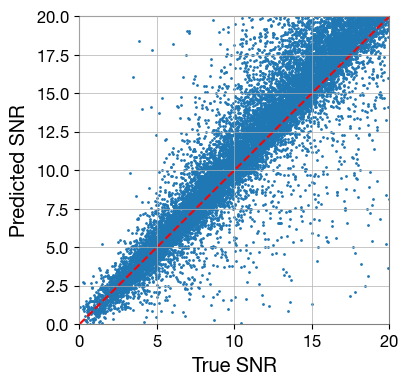

In [4]:
# plot the predicted snr vs true snr
plt.figure(figsize=[4,4])
plt.scatter(true_snr, pred_snr, s=1)
snr_lim = [np.min([true_snr, true_snr]), np.max([true_snr, true_snr])]
plt.plot(snr_lim, snr_lim, 'r--')
plt.xlabel('True SNR')
plt.ylabel('Predicted SNR')
plt.xlim([0, 20])
plt.ylim([0, 20])
plt.show()

In [5]:
# use the following function to predict the pdet
pred_pdet = np.array([1 if snr >= 8.0 else 0 for snr in pred_snr])
# true pdet
true_pdet = np.array([1 if snr >= 8.0 else 0 for snr in true_snr])

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(true_pdet, pred_pdet)
print(cm)

acc = accuracy_score(true_pdet, pred_pdet)
print(acc)

[[ 4359   583]
 [  464 44594]]
0.97906
